##**Методы машинного обучения для оценки содержания азота в растениях по аэрофотоснимкам**

Этот блокнот предназначен для обучения нейросетевых методов машинного обучения.

**Подключение необходимых библиотек**

In [1]:
import gdown
import numpy as np
import matplotlib.pyplot as plt

**Загрузка данных**

In [5]:
synth_url = 'https://drive.google.com/uc?id=1cofQeepo06m3scui5aLkx_ch6Ti6CxLZ'
test_url = 'https://drive.google.com/uc?id=1--GE0W5X7i0c-08In3LcWZ-VdnYbvOTT'
synth_path = "train_images_and_masks.npz"
test_path = "test_images_and_masks.npz"
gdown.download(synth_url, synth_path, quiet=False)
gdown.download(test_url, test_path, quiet=False)
synth_data = np.load(synth_path)
test_data = np.load(test_path)
train_images = synth_data["synth_images"]
train_masks = synth_data["synth_masks"]
test_images = test_data["test_images"]
test_masks = test_data["test_masks"]

Downloading...
From (original): https://drive.google.com/uc?id=1cofQeepo06m3scui5aLkx_ch6Ti6CxLZ
From (redirected): https://drive.google.com/uc?id=1cofQeepo06m3scui5aLkx_ch6Ti6CxLZ&confirm=t&uuid=9f49728d-8c03-4cf1-98db-ef43227a24af
To: /content/train_images_and_masks.npz
100%|██████████| 298M/298M [00:02<00:00, 107MB/s]
Downloading...
From: https://drive.google.com/uc?id=1--GE0W5X7i0c-08In3LcWZ-VdnYbvOTT
To: /content/test_images_and_masks.npz
100%|██████████| 6.28M/6.28M [00:00<00:00, 136MB/s]


**Проверка данных и визуализация изображений**

In [6]:
print(train_images.shape)
print(train_masks.shape)
print(test_images.shape)
print(test_masks.shape)

(3000, 128, 128, 6)
(3000, 128, 128, 1)
(66, 128, 128, 6)
(66, 128, 128, 1)


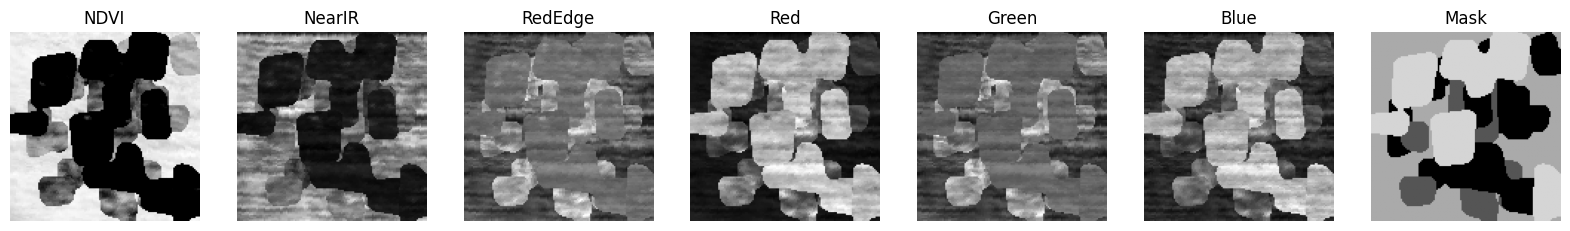

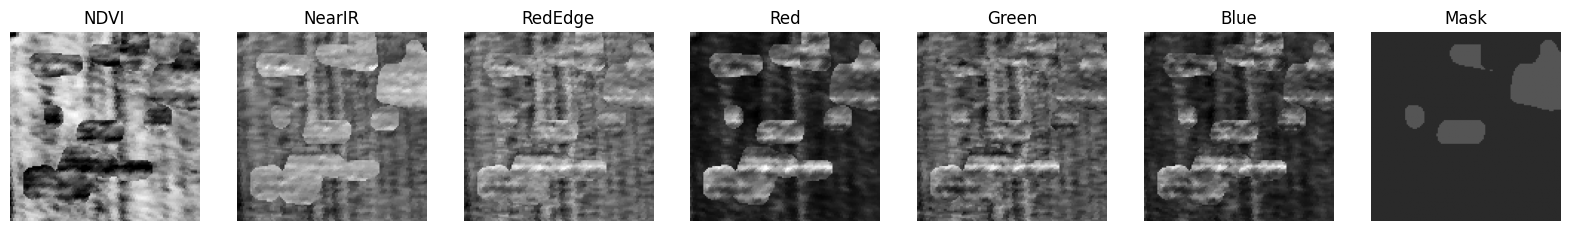

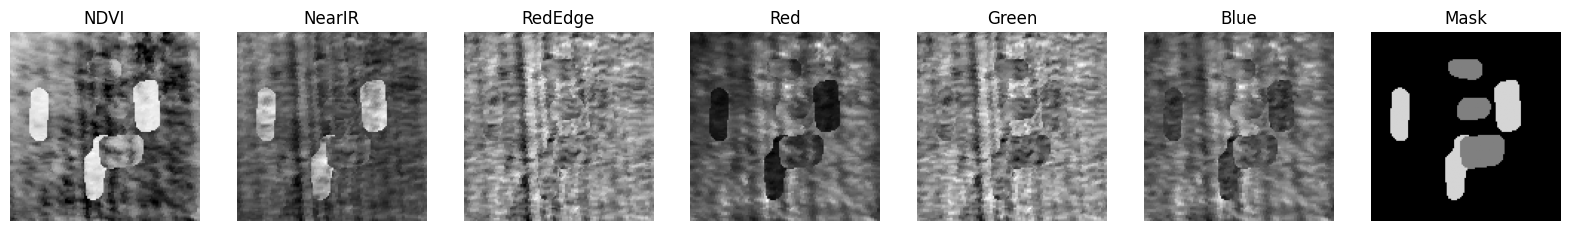

In [8]:
# Названия каналов для подписей
channel_names = ["NDVI", "NearIR", "RedEdge", "Red", "Green", "Blue"]

def visualize_samples(images, masks, num_samples=3):
    """
    Визуализирует несколько примеров изображений и их масок.

    Параметры:
    - images: numpy-массив изображений (размерность: [N, 128, 128, 6])
    - masks: numpy-массив масок (размерность: [N, 128, 128, 1])
    - num_samples: количество примеров для отображения
    """

    for i in range(num_samples):
        img = images[i]  # Берём одно изображение (6 каналов)
        mask = masks[i].squeeze()  # Убираем лишнюю ось (128, 128)

        fig, ax = plt.subplots(1, 7, figsize=(20, 5))

        # Визуализируем все 6 каналов с подписями
        for j in range(6):
            ax[j].imshow(img[:, :, j], cmap="gray")
            ax[j].set_title(channel_names[j])  # Добавляем подпись
            ax[j].axis("Off")

        # Визуализируем маску (размеченные классы)
        ax[-1].imshow(mask, cmap="gray", vmin=0, vmax=6)
        ax[-1].set_title("Mask")
        ax[-1].axis("Off")

        plt.show()

# Вызываем функцию для отображения 3 примеров
visualize_samples(train_images, train_masks)